## **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Reading the files**

In [2]:
train_data = pd.read_csv('train.csv', index_col = 'PassengerId')

## **Shape of the dataset**

In [3]:
print("The shape of the train_dataset is: {} rows and {} columns".format(train_data.shape[0], train_data.shape[1]))

The shape of the train_dataset is: 891 rows and 11 columns


## **Quick view of data**

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The meaning of each attribute is the following:

**PassengerId**: the ID given to each passenger<br>
**Survived**: the target attribute (1 for passengers who survived, 0 for those who didn't)<br>
**Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd class)<br>
**Name, Sex, Age**: Name of the person, Gender of the person, Age of the person<br>
**SibSp**: Number of siblings & spouses aboard the Titanic<br>
**Parch**: Number of parents & children aboard the Titanic<br>
**Ticket**: Ticket number<br>
**Fare**: Passenger fare (in pounds)<br>
**Cabin**: Passenger's cabin number<br>
**Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Exploratory Data Analysis (EDA)

For **Numerical Columns**

In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Things To Note:-**<br>
1) **Age** has **null** values.<br>
2) Only **38** percent of people **survived**.<br>
3) **Mean** and **Median** of the **Age** is approx **30** and **28**.<br>
4) **Mean Fare** is about **32.2 euros**.<br>
5) **Minimum Age** is **0.42 years** and **Maximum Age** is **80 years**.<br> 
#### **NOTE:-** These all attributes have different scales

### Finding the correlation 

In [6]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Showing that the numerical columns have different scales

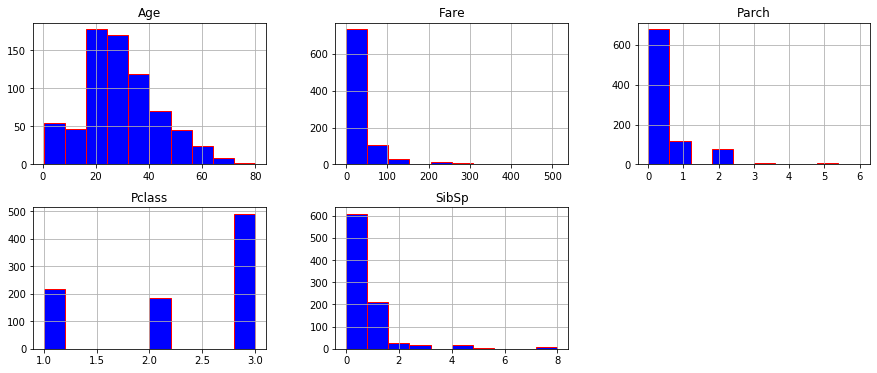

In [7]:
numerical_attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
train_data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 3));

**Things to note down:-**<br>
1) Dividing the age in two categories, young where **age<40** and old where **age>40** because the probability of survival is high for people having age<40.<br>
2) **Approx 700** people **less paid** for trip.<br>
3) **More than 600** people has **no parent** on board and **no sibling** on board with them.<br>
4) **Approx 500** people has 3rd ticket class which is highest amoung others.<br>

In [8]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bystrom, Mrs. (Karolina)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


It is telling **How many non-null values** are there and **What is the Datatype** of each feature

## **Calculating the missing values.**

In [10]:
missing_values = train_data.isnull().sum().sort_values(ascending = False)
print(missing_values)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64


In [11]:
percent_missing = ((train_data.isnull().sum() / train_data.shape[0]) * 100).sort_values(ascending = False)
print(percent_missing)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
Fare         0.000000
Ticket       0.000000
Parch        0.000000
SibSp        0.000000
Sex          0.000000
Name         0.000000
Pclass       0.000000
Survived     0.000000
dtype: float64


In [12]:
missing_data = pd.concat([missing_values, percent_missing], axis = 1, keys = ['Counts', '%'])
missing_data

,Counts,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


## **Displaying the percentage of missing values by column**

In [13]:
miss_values = train_data.isnull().sum()
total_cells = np.product(train_data.shape)
total_missing = miss_values.sum()
miss = (total_missing/total_cells)*100
print("Overall Missing Percentage Value: {} %".format(miss))

Overall Missing Percentage Value: 8.835833078257322 %


## Filling missing values using bfill method

In [14]:
train_data = train_data.fillna(method = 'bfill', axis = 0).fillna(0)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


## Showing that, now there are no null values

In [15]:
missing_values = train_data.isnull().sum()
missing_values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Data Visualization

### 1) Pclass Attribute

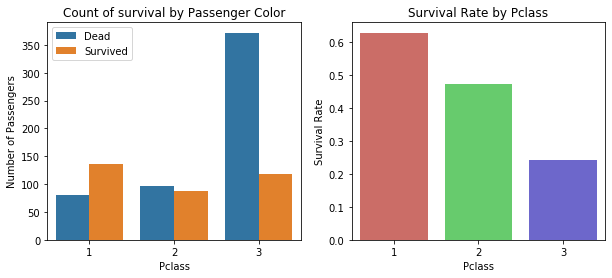

In [16]:
fig, (graph1, graph2) = plt.subplots(1,2, figsize = (10,4))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data, palette = 'tab10', ax = graph1)
graph1.set_title('Count of survival by Passenger Color')
graph1.set_xlabel('Pclass')
graph1.set_ylabel('Number of Passengers')
graph1.legend(labels = ['Dead', 'Survived']);

sns.barplot(x = 'Pclass', y = 'Survived', data = train_data, palette = 'hls', ci = None, ax  =graph2)
graph2.set_title('Survival Rate by Pclass')
graph2.set_xlabel('Pclass')
graph2.set_ylabel('Survival Rate');

In [17]:
pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize = 'index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## **Note:-**
1) More number of people traveled in **3rd class** but had a less chance of survival as compare to other classes.<br>
2) People travel in **1st class** had higher survival rate as compare to other classes.<br>
3) Only **24%** people travel in 3rd class survived.<br>
4) Survival rate of **2nd and 3rd class** is lower than **50%**.<br>

### 2) Age Attribute

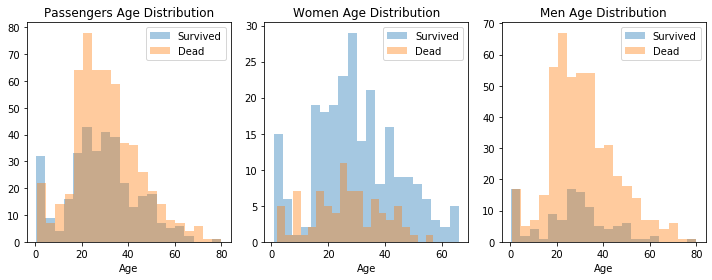

In [18]:
male = train_data[train_data['Sex']=='male']
female = train_data[train_data['Sex']=='female']

fig, (graph1, graph2, graph3) = plt.subplots(1,3, figsize = (10,4))

sns.distplot(train_data[train_data['Survived'] == 1]['Age'], bins = 20, label = 'Survived', ax = graph1, kde = False)
sns.distplot(train_data[train_data['Survived'] == 0]['Age'], bins = 20, label = 'Dead', ax = graph1, kde = False)
graph1.legend()
graph1.set_title('Passengers Age Distribution')

sns.distplot(female[female['Survived'] == 1]['Age'], bins = 20, label = 'Survived', ax = graph2, kde = False)
sns.distplot(female[female['Survived'] == 0]['Age'], bins = 20, label = 'Dead', ax = graph2, kde = False)
graph2.legend()
graph2.set_title('Women Age Distribution')

sns.distplot(male[male['Survived'] == 1]['Age'],bins = 20, label = 'Survived', ax = graph3, kde = False)
sns.distplot(male[male['Survived'] == 0]['Age'], bins = 20, label = 'Dead', ax = graph3, kde = False)
graph3.legend()
graph3.set_title('Men Age Distribution')

plt.tight_layout();

## Note:-
1) **Women and Children** has high survival rate as compare to **men**.<br>
2) Highest age of the person on board is **80 years** so we can divide the ages into different groups to know survival rate better in terms of ages.<br>
3) **Young** people has **high** survival rate as compare to **old** people.<br>

#### Divide the ages in 5 groups and showing their chances of their survival

In [19]:
train_data['Age_Bin'] = (train_data['Age']//20)*20
train_data[['Age_Bin', 'Survived']].groupby(['Age_Bin']).mean()

,Survived
Age_Bin,
0.0,0.447761
20.0,0.360417
40.0,0.382022
60.0,0.333333
80.0,0.500000


### 3) Gender Attribute

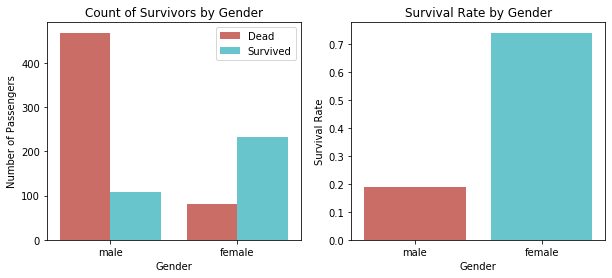

In [20]:
fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'Sex', hue = 'Survived', data = train_data,  palette = 'hls', ax = graph1) 
graph1.set_title('Count of Survivors by Gender')
graph1.set_xlabel('Gender')
graph1.set_ylabel('Number of Passengers')
graph1.legend(labels = ['Dead', 'Survived']);

sns.barplot(x = 'Sex', y = 'Survived', data = train_data,  palette = 'hls', ci = None, ax = graph2)
graph2.set_title('Survival Rate by Gender')
graph2.set_xlabel('Gender')
graph2.set_ylabel('Survival Rate');

In [21]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize = 'index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


## Note:- 
**Women and children has high survival rate** as they follow **women and children first** protocol.

## 4) Embarkation

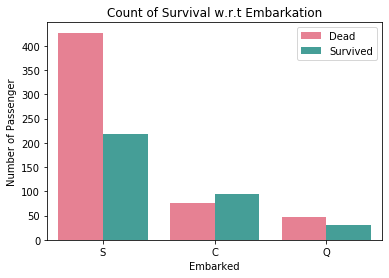

In [22]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data,  palette = 'husl') 
plt.ylabel('Number of Passenger')
plt.title('Count of Survival w.r.t Embarkation')
plt.legend(['Dead', 'Survived']);

## 5) Fare

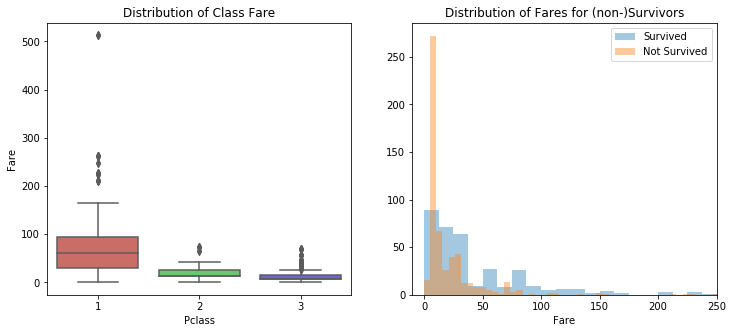

In [23]:
fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(x = 'Pclass', y = 'Fare', data = train_data, palette = 'hls', ax = graph1)
graph1.set_title('Distribution of Class Fare')

sns.distplot(train_data[train_data['Survived'] == 1]['Fare'], label = 'Survived', ax = graph2, kde = False)
sns.distplot(train_data[train_data['Survived'] == 0]['Fare'], label = 'Not Survived', ax = graph2, kde = False)
graph2.set_title('Distribution of Fares for (non-)Survivors')
graph2.set_xlim([-10, 250])
graph2.legend();

## 6)Parch and SibSp

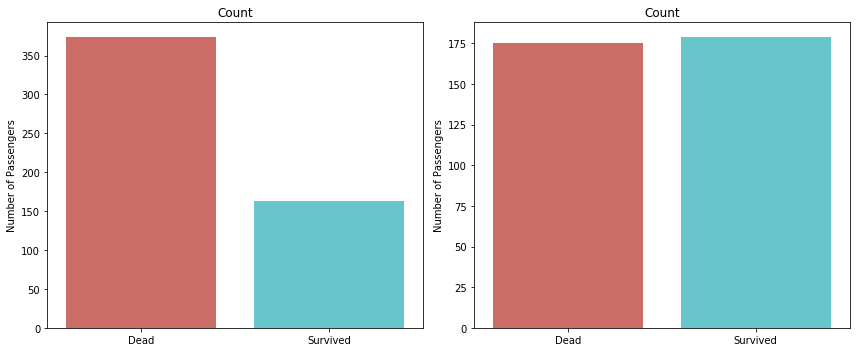

In [24]:
alone = train_data[(train_data['SibSp'] == 0) & (train_data['Parch'] == 0)]
not_alone = train_data[(train_data['SibSp'] != 0) | (train_data['Parch'] != 0)]

fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Survived', data = alone,  palette = 'hls', ax = graph1) 
graph1.set_title('Count')
graph1.set_xlabel('')
graph1.set_xticklabels(['Dead', 'Survived'])
graph1.set_ylabel('Number of Passengers')

sns.countplot(x = 'Survived', data = not_alone,  palette = 'hls', ax = graph2) 
graph2.set_title('Count')
graph2.set_xlabel('')
graph2.set_xticklabels(['Dead', 'Survived'])
graph2.set_ylabel('Number of Passengers')

plt.tight_layout();

## Showing survival rate by Number of Relatives Onboard

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


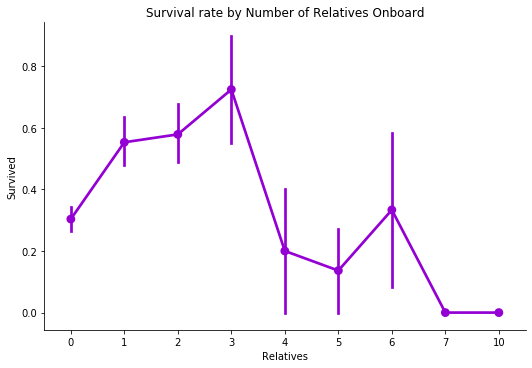

In [25]:
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
sns.factorplot('Relatives', 'Survived', data = train_data, color = 'darkviolet', aspect = 1.5)
plt.title('Survival rate by Number of Relatives Onboard');

Having 1-3 relatives, **increases** the chances of survival

In [26]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

train_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
train_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'],'Rare Title', inplace = True)
train_data['Title'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

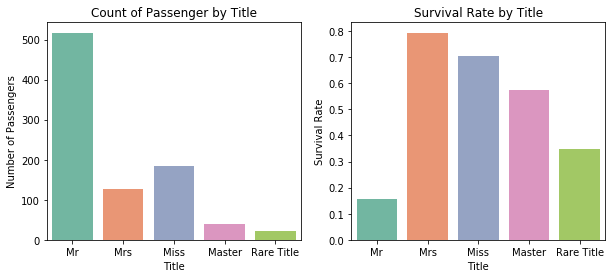

In [27]:
fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'Title', data = train_data,  palette = 'Set2', ax = graph1)
graph1.set_title('Count of Passenger by Title')
graph1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Title', y = 'Survived', data = train_data,  palette = 'Set2', ci = None, ax = graph2)
graph2.set_title('Survival Rate by Title')
graph2.set_ylabel('Survival Rate');

# Summary

In [28]:
Summary = pd.DataFrame({'Columns': ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
                        'Important': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No']})
Summary

,Columns,Important
0,Pclass,Yes
1,Name,Yes
2,Sex,Yes
3,Age,Yes
4,SibSp,Yes
5,Parch,Yes
6,Ticket,Yes
7,Fare,Yes
8,Cabin,No
9,Embarked,No
